In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Covid19.csv')
df.head()
#Cấu trúc dữ liệu

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,17/6/2020,17,6,2020,783,13,Afghanistan,AF,AFG,37172386.0,Asia
1,16/6/2020,16,6,2020,761,7,Afghanistan,AF,AFG,37172386.0,Asia
2,15/6/2020,15,6,2020,664,20,Afghanistan,AF,AFG,37172386.0,Asia
3,14/6/2020,14,6,2020,556,5,Afghanistan,AF,AFG,37172386.0,Asia
4,13/6/2020,13,6,2020,656,20,Afghanistan,AF,AFG,37172386.0,Asia


In [13]:
print('Corona Virus cases in the world:',sum(df['cases']))
print('Deaths in the world:',sum(df['deaths']))
#Thống kê tổng sô ca nhiễm và tử vong trên toàn thế giới

Corona Virus cases in the world: 8142129
Deaths in the world: 443488


In [21]:
df.drop(columns=['dateRep','day','month','year','geoId','countryterritoryCode','popData2018','continentExp']).groupby(['countriesAndTerritories']).sum()
#Thống kê tổng số ca nhiễm và tử vong theo từng quốc gia và vùng lãnh thổ

,cases,deaths
countriesAndTerritories,,
Afghanistan,26310,491
Albania,1672,37
Algeria,11147,788
Andorra,854,52
Angola,142,6
...,...,...
Vietnam,335,0
Western_Sahara,23,1
Yemen,889,215


In [22]:
import matplotlib.pyplot as plt

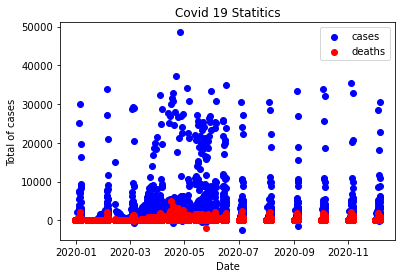

In [47]:
format_dict = {'dateRep':'{:%Y}'}
df['dateRep'] = pd.to_datetime(df['dateRep'])
df.head().style.format(format_dict)
plt.scatter(df['dateRep'], df['cases'], label='cases', color='Blue')
plt.scatter(df['dateRep'], df['deaths'], label='deaths', color='Red')
plt.xlabel('Date')
plt.ylabel('Total of cases')
plt.title('Covid 19 Statitics')
plt.grid(False)
plt.legend()

In [56]:
!pip install seaborn

In [57]:
import seaborn as sns

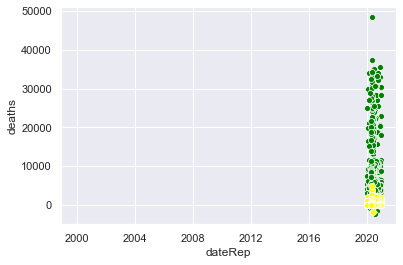

In [68]:
sns.set()
sns.scatterplot(df['dateRep'], df['cases'], color='Green')
sns.scatterplot(df['dateRep'], df['deaths'], color='Yellow')

In [70]:
import altair as alt
alt.data_transformers.enable('csv')
alt.Chart(df).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='month(dateRep):O',
    y='count():Q',
    color='continentExp:N'
)

alt.Chart(...)

In [78]:
alt.Chart(df).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('month(dateRep):O', axis=alt.Axis(labelAngle=0)),
    alt.Y('continentExp:N'),
    alt.Size('deaths:Q',
        scale=alt.Scale(range=[0, 1500]),
        legend=alt.Legend(title='Covid 19 Deaths')
    ),
    alt.Color('continentExp:N', legend=None)
).properties(
    width=450,
    height=320
).transform_filter(
    alt.datum.continentExp != 'All continentExp'
)

alt.Chart(...)